# Controllability of complex networks

Paper by Yang-Yu Liu, Jean-Jacques Slotine & Albert-László Barabási

### Lucas Machado Moschen

In [2]:
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt

The ultimate understanding os the natural and technological system can be observed when we can control them, that is, with suitable choice of the inputs we can drive the system from a initial point to a desirable in a finite time. This article treats to study tools of controllability of complex directed networks. Some analytical tools are developed in special as I will present in this notebook. We know that real systems are generally driven by nonlinear processes. However theses systems are structurally similar to linear systems. 
$$
\frac{dx(t)}{dt} = Ax(t) + Bu(t),
$$
where $x(t) \in \mathbb{R}^n$ indicates the state of the $n$ nodes at time $t$ and $u(t) \in \mathbb{R}^m$ is the input vector that controls the system. Consider the graph $G(A,B)$ with the nodes being the state variables and the iinput variables. If the state $x_j$ points to $x_i$, we denote $j \to i$. 

$A := (a_{ij})_{n \times n}$, such that $a_{ij} = \begin{cases} 0, &\text{if }j \not \rightarrow i \\ 
> 0, &\text{if }j \rightarrow i \text{ is excitatory} \\ 
< 0, &\text{if }j \rightarrow i \text{ is inhibitory}\end{cases}$

$B$ has the same structure as $A$, but each $b_{ij}$ indicates if the control $j$ points to the state $i$. 

#### First example NetworkX

$$
A = \begin{bmatrix}
0 & 0 & 0 \\
a_{21} & 0 & 0 \\
a_{31} & 0 & 0 \\
\end{bmatrix}
$$

and 

$$
B = \begin{bmatrix}
b_{11} \\
0 \\
0 \\
\end{bmatrix}
$$

In [3]:
G = nx.DiGraph()
G.add_nodes_from([
    ('x1', {"type": "state"}),
    ('x2', {"type": "state"}), 
    ('x3', {"type": "state"}),
    ('u1', {"type": "control"})
])
G.add_edges_from([
    ('x1', 'x2'),
    ('x1', 'x3'),
    ('u1', 'x1')
])

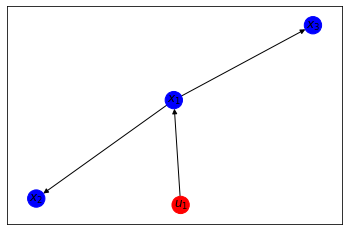

In [4]:
mapping = {'state': 'blue', 'control': 'red'}
colors = [mapping[node[1]['type']] for node in G.nodes.data()]
labels = {'x1': r"$x_1$", 'x2': r"$x_2$", 'x3': r"$x_3$", 'u1': r"$u_1$"}

nc = nx.draw_networkx(G, node_color=colors, labels = labels, font_color = 'black')

The set of controllable pairs $(A,B)$ is open and dense in the space of all pairs, that is, if $(A_0, B_0)$ is not controllable, for all $\epsilon > 0$, there exists $(A,B)$ controllable such that 
$$||A - A_0|| < \epsilon \text{ and } ||B - B_0|| < \epsilon$$

The state nodes connected to the input variables (control variables) are the **controlled nodes**. When controlled node don't share input nodes, we call them **Driver Nodes**.

#### Example 2

In [5]:
G = nx.DiGraph()
states = [('x' + str(i), {"type": "state"}) for i in range(1,21)]
controls = [('u' + str(i), {"type": "control"}) for i in range(1,4)]
G.add_nodes_from(states)
G.add_nodes_from(controls)
G.add_edges_from([
    ('x1', 'x2'),
    ('x2', 'x3'),
    ('x3', 'x4'),
    ('x1', 'x5'),
    ('x5', 'x6'),
    ('x6', 'x7'),
    ('x7', 'x8'),
    ('x8', 'x5'),
    ('x1', 'x9'),
    ('x9', 'x10'),
    ('x10', 'x11'),
    ('x11', 'x12'),
    ('x12', 'x9'),
    ('x2', 'x6'),
    ('x2', 'x13'),
    ('x13', 'x14'),
    ('x14', 'x13'),
    ('x15', 'x2'),
    ('x15', 'x16'),
    ('x16', 'x17'),
    ('x17', 'x15'),
    ('x15', 'x10'),
    ('x18', 'x19'),
    ('x18', 'x20'),
    ('u1', 'x1'), 
    ('u1', 'x5'), 
    ('u1', 'x9'),
    ('u2', 'x18'), 
    ('u3', 'x19')
])

ImportError: requires pygraphviz http://pygraphviz.github.io/

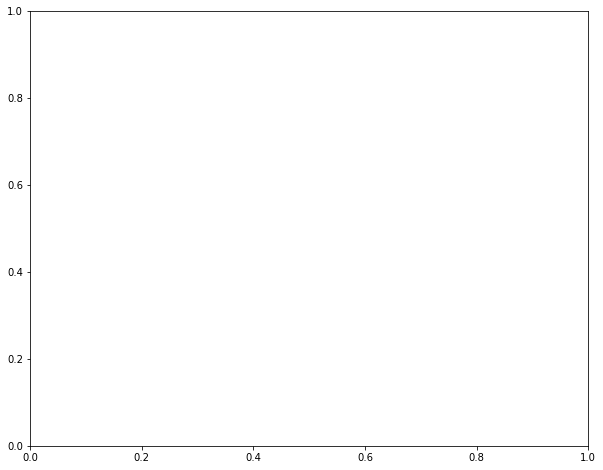

In [6]:
fig, ax = plt.subplots(figsize = (10,8))

pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
mapping = {'state': 'blue', 'control': 'red'}
colors = [mapping[node[1]['type']] for node in G.nodes.data()]
labels = {n: r"${}_{}$".format(n[0],n[1:]) for n in G.nodes()}

nc = nx.draw_networkx(G, pos, node_color=colors, 
                      labels = labels, font_color = 'black', ax = ax)

In this example the nodes $x_1, x_5, x_9, x_{18}, x_{19}$ are controlled node and $x_1, x_{18}, x_{19}$ are driver nodes. The system $(A,B)$ are structurally controllable if it's possible to choose the non-zero parameters in A and B such that $(A,B)$ is controllable. To control a system we need to find the minimum number of these driver nodes, which is sufficient to control these system. We denote this set as $N_D$. 